In [2]:
import distributions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:

df = pd.read_csv('VIX_History.csv')
#  we only keep the columns we need: Date and Close
df = df[['DATE', 'CLOSE']]

# we only keep the last X months of time, per an input on sidebar
months = 360
# we convert months to days
days = months * 30
# we only keep the last X days of time
df = df.tail(days)

# we divide the Close column by 100 to get the VIX in %
df['CLOSE'] = df['CLOSE']/100
# we make dates into date format YYYY-MM-DD
df['DATE'] = pd.to_datetime(df['DATE'])


# st.dataframe(df)

#  we read SP500_historical.csv into a dataframe
df2 = pd.read_csv('SP500_historical.csv')
# we rename columns to DATE and CLOSE
df2 = df2.rename(columns={'Date': 'DATE', 'Close': 'CLOSE'})
# we make dates into date format
df2['DATE'] = pd.to_datetime(df2['DATE'])
# we do a left join on the two dataframes, using the DATE column as key, starting with the VIX dataframe
df3 = pd.merge(df, df2, on='DATE', how='left')
# we drop the rows with NaN values
df3 = df3.dropna()
# we rename the columns CLOSE_x and CLOSE_y to VIX and SP500
df3 = df3.rename(columns={'CLOSE_x': 'VIX', 'CLOSE_y': 'SP500'})
# for column SP500, we remove any "," in values and convert to float
df3['SP500'] = df3['SP500'].str.replace(',', '').astype(float)



C:\Users\jordi\AppData\Local\Temp\ipykernel_7668\1602217962.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['DATE'] = pd.to_datetime(df2['DATE'])


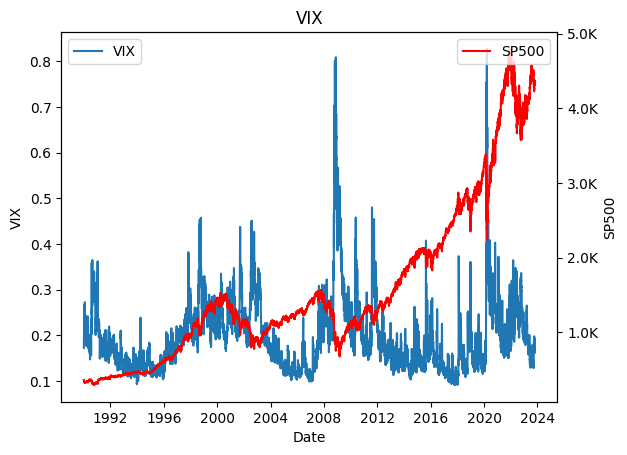

In [4]:



import matplotlib.pyplot as plt

# we plot both VIX and SP500 on the same chart (2 Y axis)
fig3, ax3 = plt.subplots()
ax3.plot(df3['DATE'], df3['VIX'], label='VIX')
ax3.set_xlabel('Date')
ax3.set_ylabel('VIX')
ax3.set_title('VIX')
ax3.grid(False)
ax3.legend(loc='upper left')
# we add a second Y axis
ax4 = ax3.twinx()
ax4.plot(df3['DATE'], df3['SP500'], label='SP500', color='red')
# ax4.yaxis.set_ticks(np.arange(0, 5000, 500))

# ax4.yaxis.set_ticks(np.arange(min_value, max_value, step_value))
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{x * 1e-3}K'

ax4.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

ax4.set_ylabel('SP500')
ax4.legend(loc='upper right')
ax4.grid(False)

# show the plot
plt.show()


In [5]:
df3.head(10)

,DATE,VIX,SP500
0,1990-01-02,0.1724,359.69
1,1990-01-03,0.1819,358.76
2,1990-01-04,0.1922,355.67
3,1990-01-05,0.2011,352.20
4,1990-01-08,0.2026,353.79
5,1990-01-09,0.2220,349.62
6,1990-01-10,0.2244,347.31
7,1990-01-11,0.2005,348.53
8,1990-01-12,0.2464,339.93
9,1990-01-15,0.2634,337.00


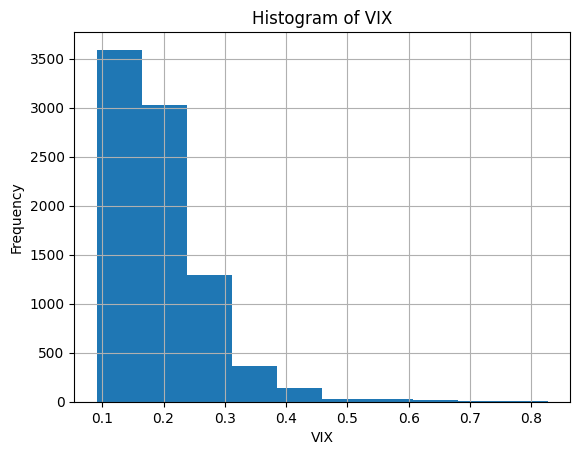

In [6]:
df3['VIX'].hist()
plt.title('Histogram of VIX')
plt.xlabel('VIX')
plt.ylabel('Frequency')
plt.show()


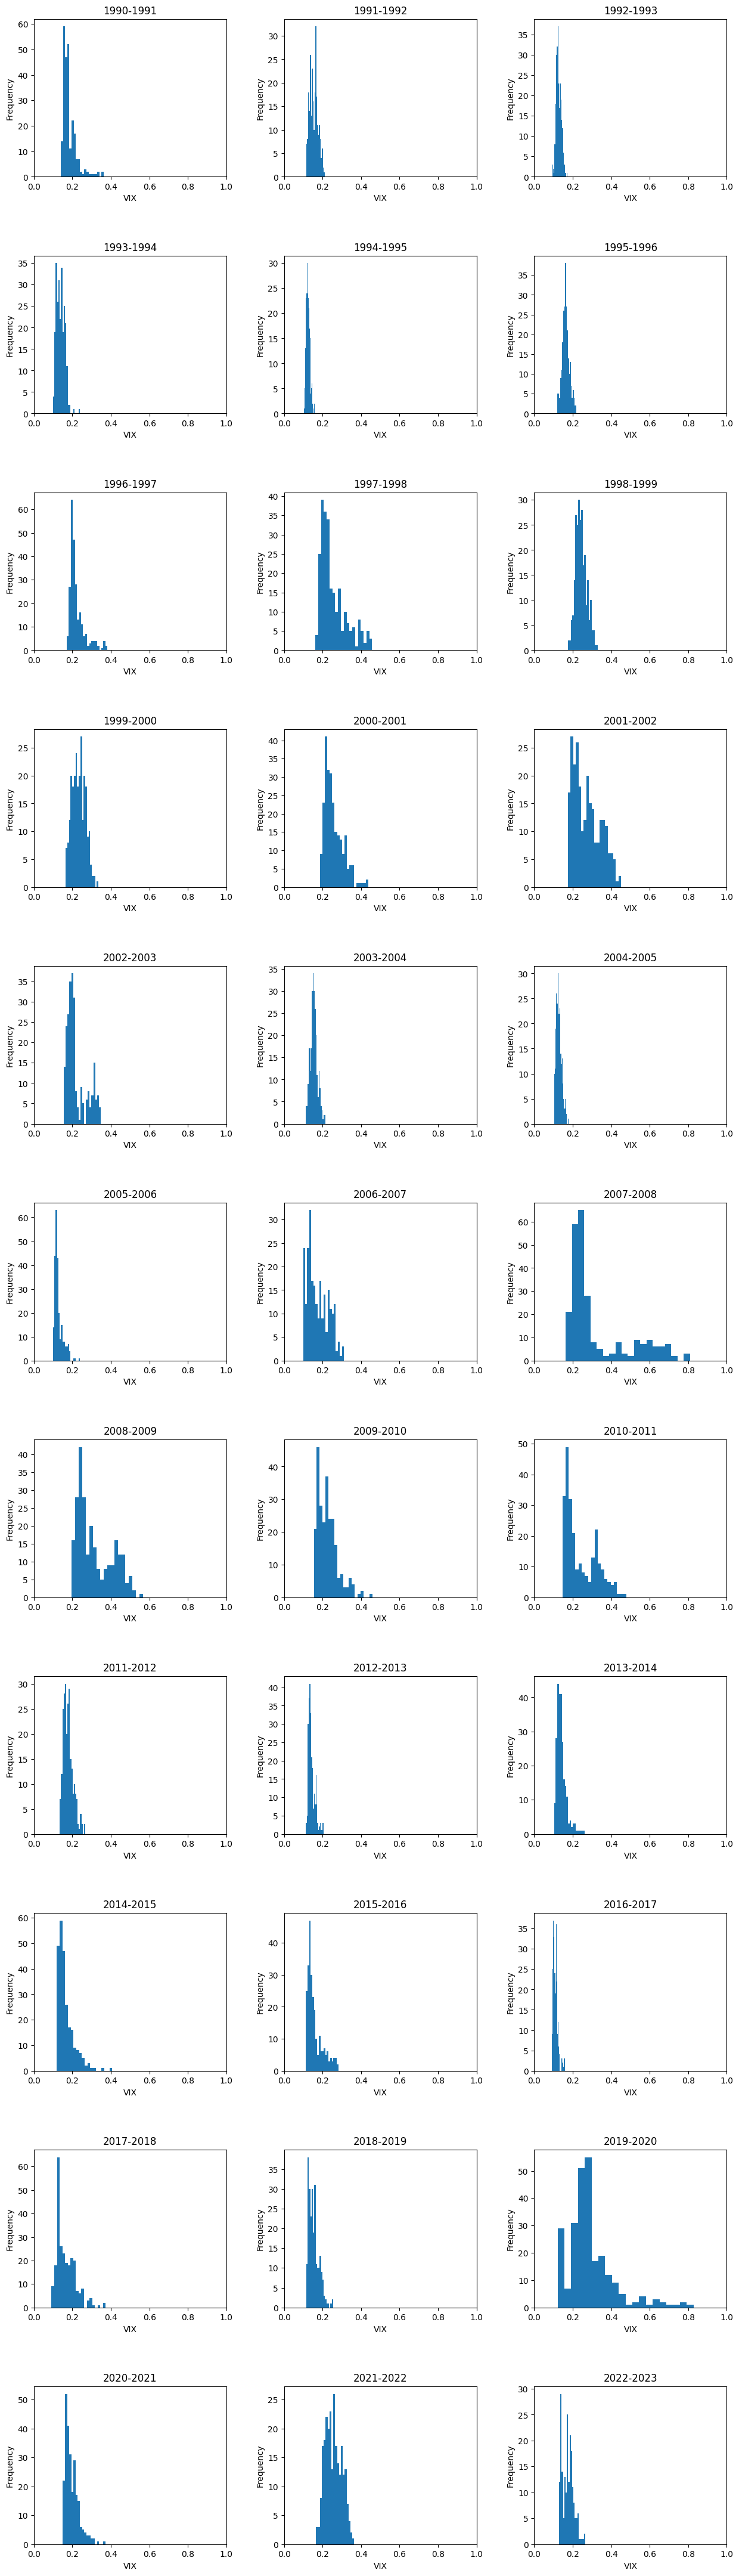

In [7]:
# we calculate the start and end dates for each 3-year period
start_dates = pd.date_range(start=df3['DATE'].min(), end=df3['DATE'].max(), freq='1Y')
end_dates = start_dates + pd.DateOffset(years=1) - pd.DateOffset(days=1)

# we calculate the number of subplots needed
num_subplots = len(start_dates)

# we calculate the number of rows and columns needed for the subplots
num_rows = int(num_subplots/3) + (num_subplots % 3 > 0)
num_cols = 3

# we create a figure with the required number of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# we loop through each subplot and plot the histogram for the corresponding X-year period
for i, ax in enumerate(axs.flatten()):
    if i < num_subplots:
        start_date = start_dates[i]
        end_date = end_dates[i]
        df_period = df3[(df3['DATE'] >= start_date) & (df3['DATE'] <= end_date)]
        ax.hist(df_period['VIX'], bins=20)
        ax.set_title(f'{start_date.year}-{end_date.year}')
        ax.set_xlabel('VIX')
        ax.set_ylabel('Frequency')
        ax.set_xlim([0, 1]) # set the same range for all subplots
    else:
        ax.axis('off')

# we adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# show the plot
plt.show()


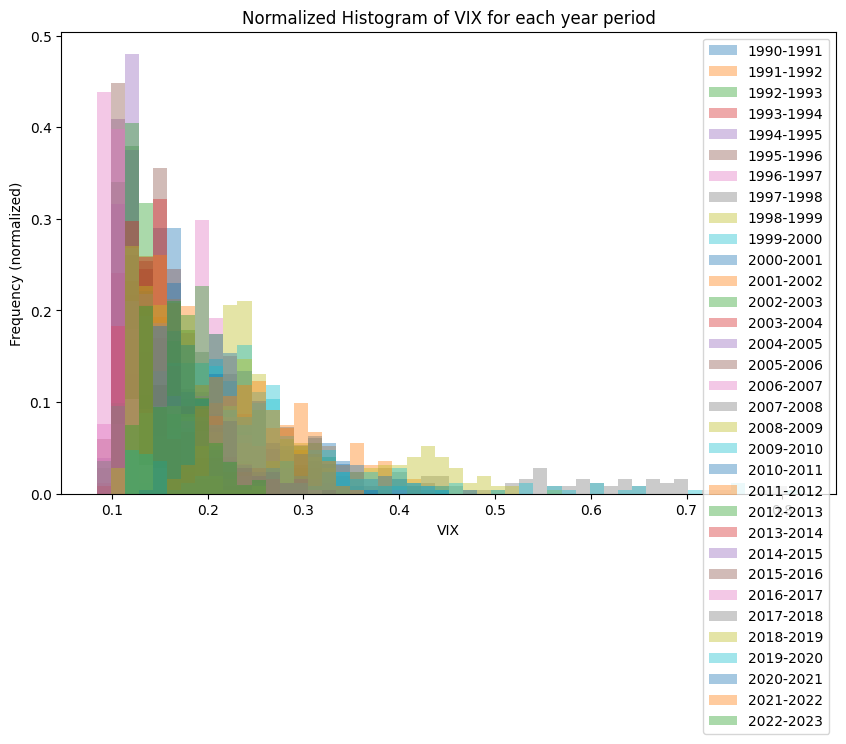

In [8]:
# calculate the minimum and maximum values of the VIX column for all time periods
vix_min = df3['VIX'].min()
vix_max = df3['VIX'].max()

# define the bins for all histograms
num_bins = 50
bins = np.linspace(vix_min, vix_max, num_bins+1)

# create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# loop through each subplot and plot it on the new axis with a 20% transparency shade
for i in range(num_subplots):
    start_date = start_dates[i]
    end_date = end_dates[i]
    df_period = df3[(df3['DATE'] >= start_date) & (df3['DATE'] <= end_date)]
    hist, _ = np.histogram(df_period['VIX'], bins=bins)
    hist_norm = hist / len(df_period)
    ax.bar(bins[:-1], hist_norm, width=(bins[1]-bins[0]), alpha=0.4, label=f'{start_date.year}-{end_date.year}')

# set the title and axis labels
ax.set_title('Normalized Histogram of VIX for each year period')
ax.set_xlabel('VIX')
ax.set_ylabel('Frequency (normalized)')

# add legend in top right corner
ax.legend(loc='upper right')

# show the plot
plt.show()


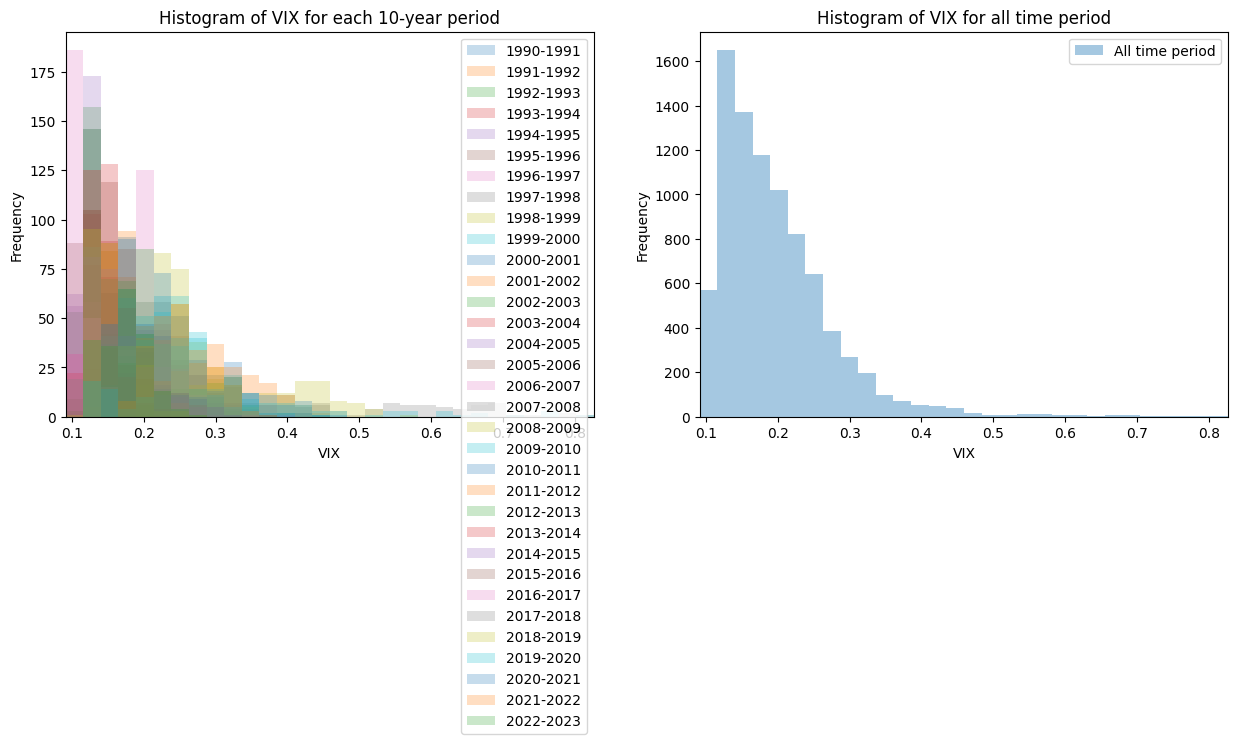

In [9]:
# define the bins for all histograms
num_bins = 30
vix_min = df3['VIX'].min()
vix_max = df3['VIX'].max()
bins = np.linspace(vix_min, vix_max, num_bins+1)

# create a new figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot the first subplot (duplicate of last plot)
for i in range(num_subplots):
    start_date = start_dates[i]
    end_date = end_dates[i]
    df_period = df3[(df3['DATE'] >= start_date) & (df3['DATE'] <= end_date)]
    axs[0].hist(df_period['VIX'], bins=bins, alpha=0.25, label=f'{start_date.year}-{end_date.year}', range=(vix_min, vix_max))

# set the title and axis labels for the first subplot
axs[0].set_title('Histogram of VIX for each 10-year period')
axs[0].set_xlabel('VIX')
axs[0].set_ylabel('Frequency')

# add legend in top right corner for the first subplot
axs[0].legend(loc='upper right')

# plot the second subplot (histogram of all time period for df3['VIX'])
axs[1].hist(df3['VIX'], bins=bins, alpha=0.4, label='All time period', range=(vix_min, vix_max))

# set the title and axis labels for the second subplot
axs[1].set_title('Histogram of VIX for all time period')
axs[1].set_xlabel('VIX')
axs[1].set_ylabel('Frequency')

# add legend in top right corner for the second subplot
axs[1].legend(loc='upper right')

# set the same X axis for all subplots
for ax in axs:
    ax.set_xlim([vix_min, vix_max])

# show the plot
plt.show()


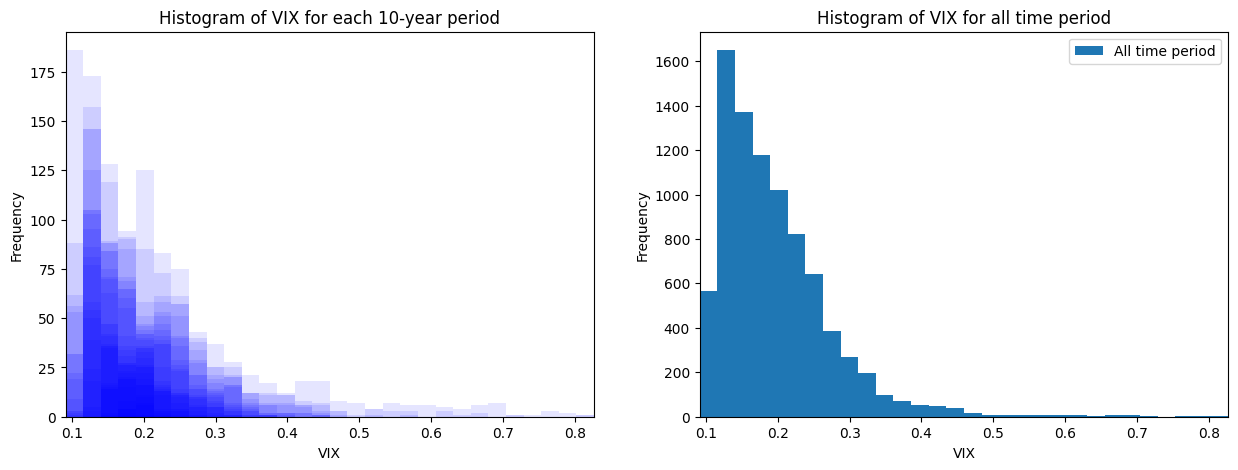

In [10]:
# define the bins for all histograms
num_bins = 30
vix_min = df3['VIX'].min()
vix_max = df3['VIX'].max()
bins = np.linspace(vix_min, vix_max, num_bins+1)

# create a new figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot the first subplot (duplicate of last plot)
for i in range(num_subplots):
    start_date = start_dates[i]
    end_date = end_dates[i]
    df_period = df3[(df3['DATE'] >= start_date) & (df3['DATE'] <= end_date)]
    axs[0].hist(df_period['VIX'], bins=bins, alpha=0.1, color='blue', range=(vix_min, vix_max))

# set the title and axis labels for the first subplot
axs[0].set_title('Histogram of VIX for each 10-year period')
axs[0].set_xlabel('VIX')
axs[0].set_ylabel('Frequency')

# plot the second subplot (histogram of all time period for df3['VIX'])
axs[1].hist(df3['VIX'], bins=bins, alpha=1, label='All time period', range=(vix_min, vix_max))

# set the title and axis labels for the second subplot
axs[1].set_title('Histogram of VIX for all time period')
axs[1].set_xlabel('VIX')
axs[1].set_ylabel('Frequency')

# add legend in top right corner for the second subplot
axs[1].legend(loc='upper right')

# set the same X axis for all subplots
for ax in axs:
    ax.set_xlim([vix_min, vix_max])

# show the plot
plt.show()


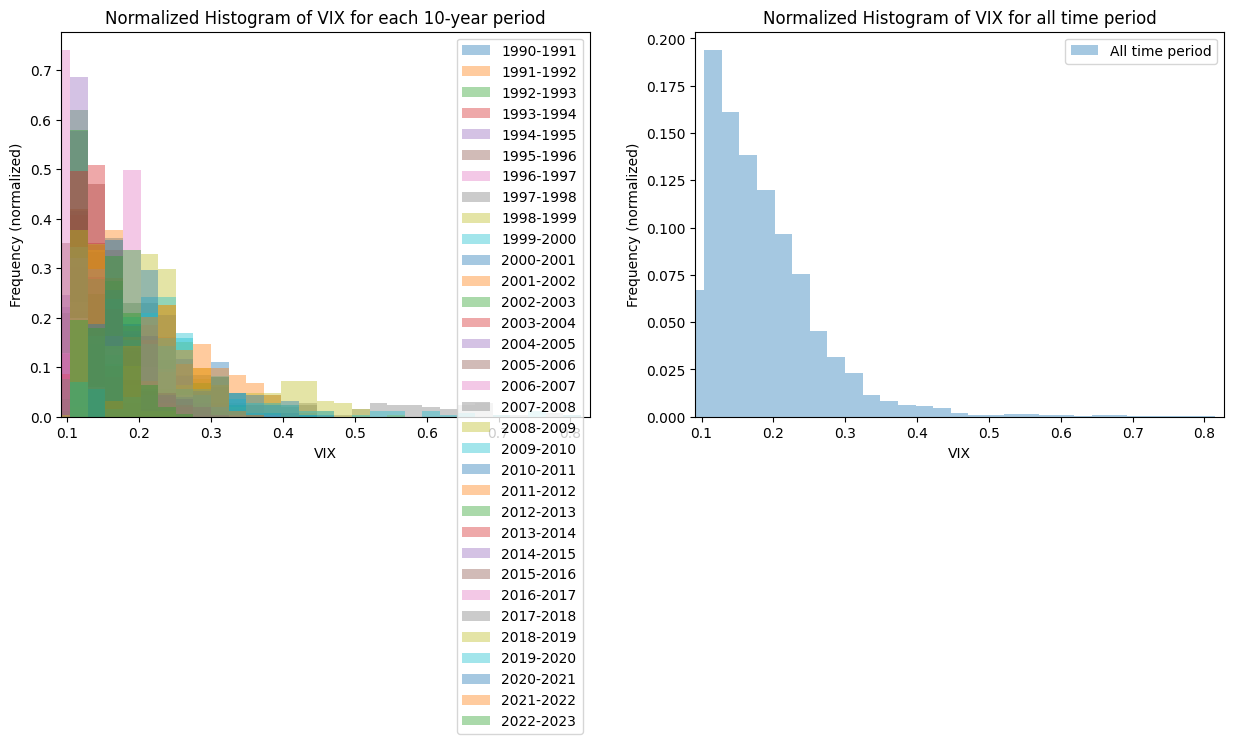

In [17]:
# define the bins for all histograms
num_bins = 30
vix_min = df3['VIX'].min()
vix_max = df3['VIX'].max()
bins = np.linspace(vix_min, vix_max, num_bins+1)

# create a new figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# plot the first subplot (duplicate of last plot)
for i in range(num_subplots):
    start_date = start_dates[i]
    end_date = end_dates[i]
    df_period = df3[(df3['DATE'] >= start_date) & (df3['DATE'] <= end_date)]
    hist, _ = np.histogram(df_period['VIX'], bins=bins)
    hist_norm = hist / len(df_period)
    axs[0].bar(bins[:-1], hist_norm, width=(bins[1]-bins[0]), alpha=0.4, label=f'{start_date.year}-{end_date.year}')

# set the title and axis labels for the first subplot
axs[0].set_title('Normalized Histogram of VIX for each 10-year period')
axs[0].set_xlabel('VIX')
axs[0].set_ylabel('Frequency (normalized)')

# add legend in top right corner for the first subplot
axs[0].legend(loc='upper right')

# plot the second subplot (histogram of all time period for df3['VIX'])
hist, _ = np.histogram(df3['VIX'], bins=bins)
hist_norm = hist / len(df3)
axs[1].bar(bins[:-1], hist_norm, width=(bins[1]-bins[0]), alpha=0.4, label='All time period')

# set the title and axis labels for the second subplot
axs[1].set_title('Normalized Histogram of VIX for all time period')
axs[1].set_xlabel('VIX')
axs[1].set_ylabel('Frequency (normalized)')

# add legend in top right corner for the second subplot
axs[1].legend(loc='upper right')

# set the same X axis for all subplots
for ax in axs:
    ax.set_xlim([vix_min, vix_max])

# show the plot
plt.show()


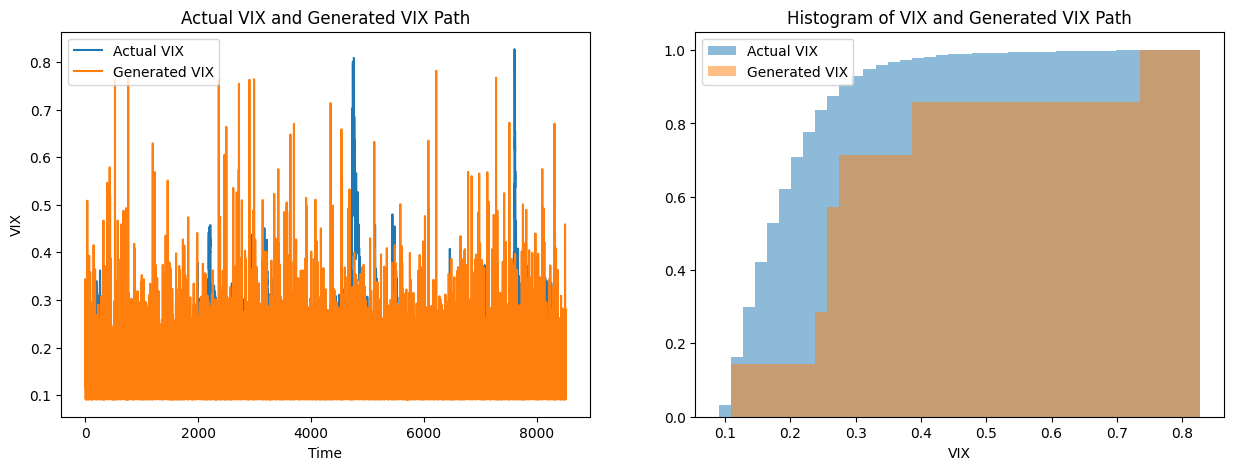

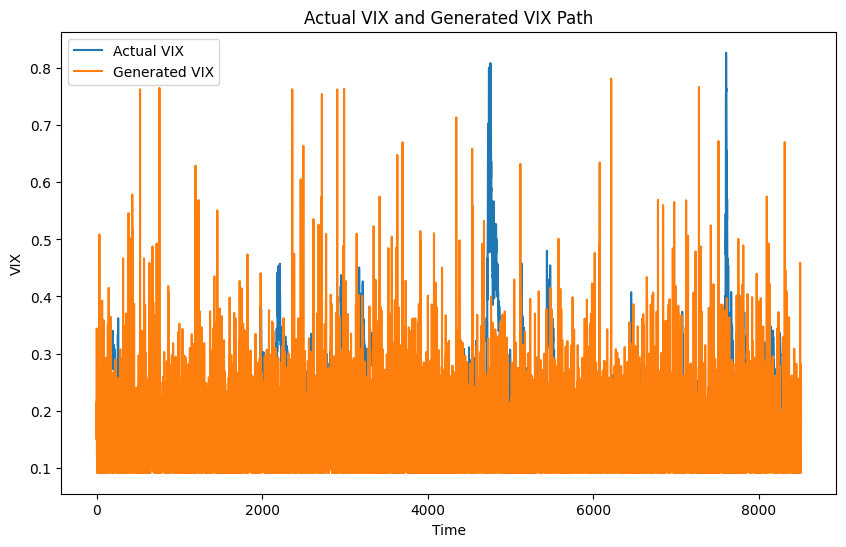

In [16]:
def generate_random_vix_path(df, num_bins=40):
    # extract the VIX data from the dataframe
    vix_data = df['VIX'].values

    # calculate the histogram of the original VIX data
    hist, bins = np.histogram(vix_data, bins=num_bins, density=True)

    # calculate the cumulative distribution function (CDF) of the original VIX data
    cdf = np.cumsum(hist * np.diff(bins))

    # calculate the inverse of the CDF of a uniform distribution between 0 and 1
    u_inv = np.linspace(0, 1, len(cdf))

    # apply the inverse of the uniform CDF to the original VIX CDF to adjust for bias
    vix_cdf_adj = np.interp(cdf, u_inv, np.linspace(0, 1, len(cdf)))

    # generate a random sample of the same size as the original VIX data from a uniform distribution between 0 and 1
    u = np.random.uniform(size=len(vix_data))

    # use the adjusted CDF to map the random sample to the corresponding VIX value
    vix_path = np.interp(u, vix_cdf_adj, bins[:-1])

    # calculate the histogram of the generated VIX data
    hist_gen, bins_gen = np.histogram(vix_path, bins=num_bins, density=True)

    # calculate the cumulative distribution function (CDF) of the generated VIX data
    cdf_gen = np.cumsum(hist_gen * np.diff(bins_gen))

    # calculate the inverse of the CDF of the generated VIX data
    u_inv_gen = np.linspace(0, 1, len(cdf_gen))

    # apply the inverse of the uniform CDF to the generated VIX CDF to adjust for bias
    vix_cdf_adj_gen = np.interp(cdf_gen, u_inv_gen, np.linspace(0, 1, len(cdf_gen)))

    # use the adjusted CDF to map the random sample to the corresponding VIX value
    vix_path_adj = np.interp(u, vix_cdf_adj_gen, bins_gen[:-1])

    # create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # plot the actual VIX and generated VIX on the first subplot
    axs[0].plot(vix_data, label='Actual VIX')
    axs[0].plot(vix_path_adj, label='Generated VIX')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('VIX')
    axs[0].set_title('Actual VIX and Generated VIX Path')
    axs[0].legend()

    # calculate the histogram of the generated VIX data
    hist_gen_adj, bins_gen_adj = np.histogram(vix_path_adj, bins=num_bins, density=True)

    # shift the generated histogram values onto the original bins
    hist_gen_shifted = np.interp(bins, bins_gen_adj[:-1], hist_gen_adj)

    # plot the original histogram and the histogram of the generated VIX path on the second subplot
    axs[1].hist(vix_data, bins=bins, alpha=0.5, label='Actual VIX', density=True, cumulative=True, range=(bins[0], bins[-1]))
    axs[1].hist(hist_gen_shifted, bins=bins, alpha=0.5, label='Generated VIX', density=True, cumulative=True, range=(bins[0], bins[-1]))
    axs[1].set_xlabel('VIX')
    axs[1].set_title('Histogram of VIX and Generated VIX Path')
    axs[1].legend()

    # plot the actual and generated VIX data on the same plot for comparison
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(vix_data, label='Actual VIX')
    ax.plot(vix_path_adj, label='Generated VIX')
    ax.set_xlabel('Time')
    ax.set_ylabel('VIX')
    ax.set_title('Actual VIX and Generated VIX Path')
    ax.legend()

    # show the plots
    plt.show()

generate_random_vix_path(df3, num_bins=40)

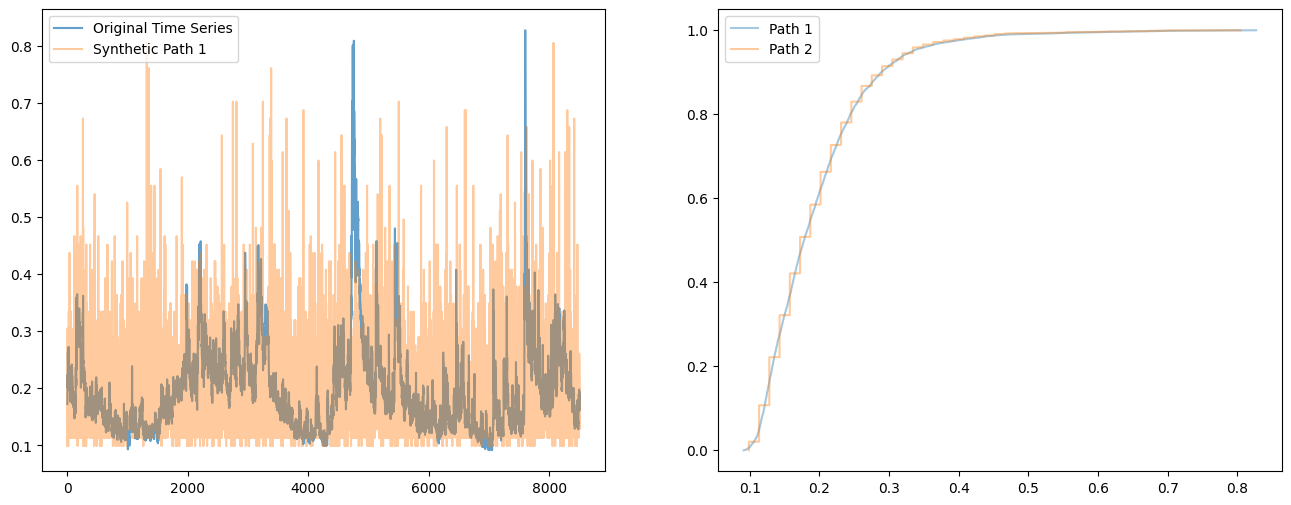

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_paths(time_series, num_paths=1, bins=50):
    """
    Generate synthetic paths with the same PDF as the input time series.

    Parameters:
    - time_series (list or np.array): The original time series data.
    - num_paths (int): Number of synthetic paths to generate.
    - bins (int): Number of bins for the histogram.

    Returns:
    - synthetic_paths (list of np.array): List of synthetic paths.
    """

    # Compute histogram of the original time series
    hist, bin_edges = np.histogram(time_series, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Generate synthetic paths
    synthetic_paths = []
    for _ in range(num_paths):
        synthetic_path = np.random.choice(bin_centers, size=len(time_series), p=hist/hist.sum())
        synthetic_paths.append(synthetic_path)

    return synthetic_paths

original_time_series = np.random.randn(1000)  # Example time series
original_time_series = vix_data = df3['VIX'].values  # Example time series


synthetic_paths = generate_synthetic_paths(original_time_series, num_paths=1)

# Plotting the original and synthetic paths
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the time series and CDFs on the first subplot
axs[0].plot(original_time_series, label="Original Time Series", alpha=0.7)
for i, path in enumerate(synthetic_paths):
    axs[0].plot(path, label=f"Synthetic Path {i+1}", alpha=0.4)
axs[0].legend()

# Plot the CDFs of the time series on the second subplot
for i, path in enumerate([original_time_series] + synthetic_paths):
    sorted_path = np.sort(path)
    cdf = np.arange(len(sorted_path)) / float(len(sorted_path))
    axs[1].plot(sorted_path, cdf, label=f"Path {i+1}", alpha=0.4)
axs[1].legend()

plt.show()


FFT_values: [1668.9444      +0.j          -77.47208154 -38.19136012j
   41.41513147 +39.05949022j ...  139.95720424-204.58802534j
   41.41513147 -39.05949022j  -77.47208154 +38.19136012j]
frequencies: [ 0.          0.00011751  0.00023502 ... -0.00035253 -0.00023502
 -0.00011751]
dominant_freq_indices: [   6 8504    3 8507    0]


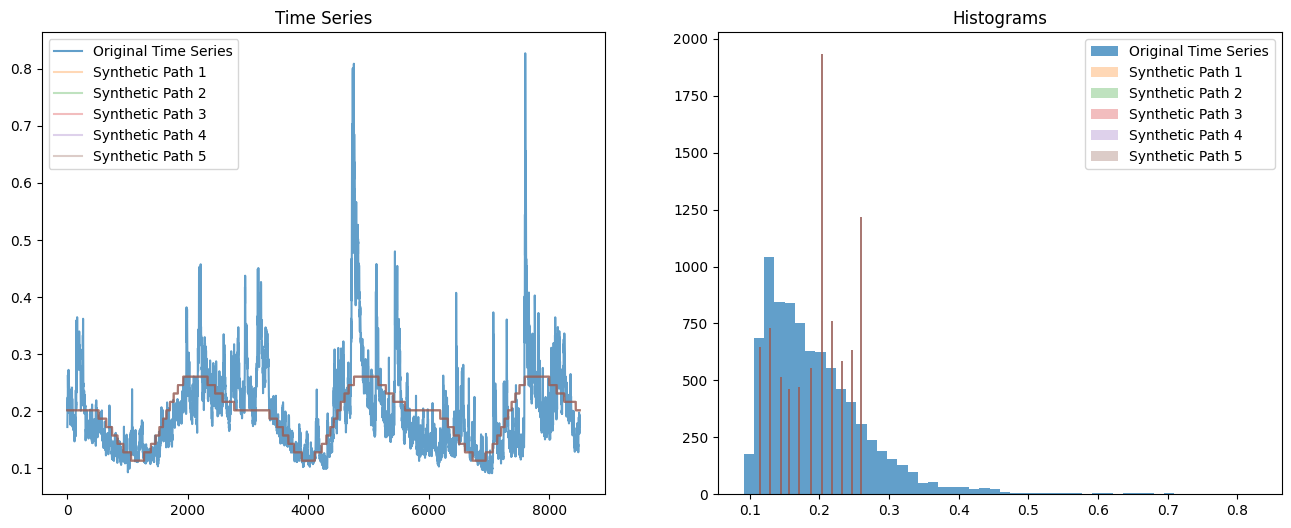

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_paths_with_memory(time_series, num_paths=1, bins=50, top_frequencies=5):
    """
    Generate synthetic paths with the same PDF and dominant frequencies as the input time series.

    Parameters:
    - time_series (list or np.array): The original time series data.
    - num_paths (int): Number of synthetic paths to generate.
    - bins (int): Number of bins for the histogram.
    - top_frequencies (int): Number of dominant frequencies to consider.

    Returns:
    - synthetic_paths (list of np.array): List of synthetic paths.
    """

    # Compute FFT of the original time series
    fft_values = np.fft.fft(time_series)
    frequencies = np.fft.fftfreq(len(time_series))
    print(f'FFT_values: {fft_values}')
    print(f'frequencies: {frequencies}')

    # Identify dominant frequencies
    dominant_freq_indices = np.argsort(np.abs(fft_values))[-top_frequencies:]
    print(f'dominant_freq_indices: {dominant_freq_indices}')

    # Generate synthetic paths
    synthetic_paths = []
    for _ in range(num_paths):
        synthetic_fft = np.zeros_like(fft_values)
        for idx in dominant_freq_indices:
            synthetic_fft[idx] = fft_values[idx]
        synthetic_path = np.fft.ifft(synthetic_fft).real

        # Adjust amplitude to match histogram of original time series
        hist, bin_edges = np.histogram(time_series, bins=bins, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        digitized = np.digitize(synthetic_path, bin_edges) - 1
        digitized = np.clip(digitized, 0, len(bin_centers) - 1)
        synthetic_path = bin_centers[digitized]

        synthetic_paths.append(synthetic_path)

    return synthetic_paths

# Example usage:
original_time_series =  vix_data  #np.sin(np.linspace(0, 50, 1000)) + 0.5*np.random.randn(1000)  # Example time series with dominant frequency
synthetic_paths = generate_synthetic_paths_with_memory(original_time_series, num_paths=5)
# Plotting the original and synthetic paths
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the time series and histograms on the first subplot
axs[0].plot(original_time_series, label="Original Time Series", alpha=0.7)
for i, path in enumerate(synthetic_paths):
    axs[0].plot(path, label=f"Synthetic Path {i+1}", alpha=0.3)
axs[0].legend()
axs[0].set_title('Time Series')

# Plot the histograms of the time series on the second subplot
axs[1].hist(original_time_series, bins=50, alpha=0.7, label='Original Time Series')
for i, path in enumerate(synthetic_paths):
    axs[1].hist(path, bins=50, alpha=0.3, label=f"Synthetic Path {i+1}")
axs[1].legend()
axs[1].set_title('Histograms')

plt.show()



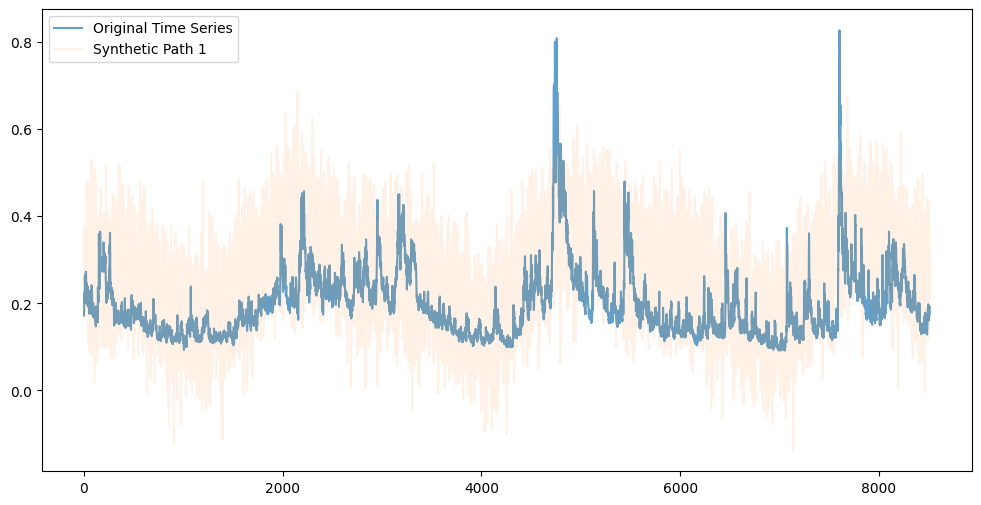

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cdf(data, bins=50):
    """Compute the CDF of the data."""
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    return cdf, bin_edges

def inverse_transform_sampling(data, cdf, bin_edges):
    """Map data to match the given CDF."""
    return np.interp(data, cdf, bin_edges[:-1])

def generate_synthetic_paths_with_memory(time_series, num_paths=1, bins=50, top_frequencies=5):
    """
    Generate synthetic paths with the same PDF and dominant frequencies as the input time series.

    Parameters:
    - time_series (list or np.array): The original time series data.
    - num_paths (int): Number of synthetic paths to generate.
    - bins (int): Number of bins for the histogram.
    - top_frequencies (int): Number of dominant frequencies to consider.

    Returns:
    - synthetic_paths (list of np.array): List of synthetic paths.
    """

    # Compute FFT of the original time series
    fft_values = np.fft.fft(time_series)
    frequencies = np.fft.fftfreq(len(time_series))

    # Identify dominant frequencies
    dominant_freq_indices = np.argsort(np.abs(fft_values))[-top_frequencies:]

    # Compute CDF of the original time series
    cdf, bin_edges = compute_cdf(time_series, bins=bins)

    # Generate synthetic paths
    synthetic_paths = []
    for _ in range(num_paths):
        synthetic_fft = np.zeros_like(fft_values)
        for idx in dominant_freq_indices:
            synthetic_fft[idx] = fft_values[idx]
        synthetic_path = np.fft.ifft(synthetic_fft).real

        # Map synthetic path to match the CDF of the original time series
        synthetic_path = inverse_transform_sampling(synthetic_path, cdf, bin_edges)

        # Adjust amplitude to match the original time series
        synthetic_path = synthetic_path * np.std(time_series) / np.std(synthetic_path)

        # Add random noise to make the synthetic paths stochastic
        synthetic_path = synthetic_path + 0.1 * np.random.randn(len(synthetic_path))

        synthetic_paths.append(synthetic_path)

    return synthetic_paths

# Example usage:
original_time_series = vix_data #np.sin(np.linspace(0, 50, 1000)) + 0.5*np.random.randn(1000)  # Example time series with dominant frequency
synthetic_paths = generate_synthetic_paths_with_memory(original_time_series, num_paths=1)

# Plotting the original and synthetic paths
plt.figure(figsize=(12, 6))
plt.plot(original_time_series, label="Original Time Series", alpha=0.7)
for i, path in enumerate(synthetic_paths):
    plt.plot((path-1.3)*0.87, label=f"Synthetic Path {i+1}", alpha=0.1)
plt.legend()
plt.show()
